### Loading in Libraries and Data

In [427]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [428]:
animaldf = pd.read_csv("FINAL Animal Data 2022.csv")

### Data Preprocessing

#### Dropping SubjectID and Run

In [430]:
animaldf = animaldf.drop(["SubjectID", "Run"], axis = 1)

#### Accounting for NaN values

##### Seeing if dropping rows is viable to get rid of Nan values

In [431]:
animaldf.shape[0]

183

In [432]:
animaldf_test = animaldf.dropna()

animaldf_test.shape[0]

107

Dropping rows is not a viable option because we will lose 76 out of 183 rows.

##### Seeing if dropping columns is viable to get rid of Nan values

In [433]:
animaldf.shape[1]

102

In [434]:
animaldf_test2 = animaldf.dropna(axis=1)

animaldf_test2.shape[1]

64

Dropping columns is not a viable option because we will lose 38 out of 102 columns.

##### Filling in 0s for NaN values

In [435]:
animaldf = animaldf.replace(np.nan, 0)

Dropping all NA values by either row or column would be impractical as it would get rid of too high a proportion of data from the dataset.

#### Ordinal encoding for categorical data

In [436]:
animaldf["Levels"].replace(["70_70", "70_90", "90_90"], [0, 1, 2], inplace = True)

In [437]:
animaldf["Group"].replace(["control", "91db", "96db"], [0, 1, 2], inplace = True)

#### ROC curves/AUC for just control vs 96 db group

In [438]:
#plt.figure(figsize=(20,10))
#sns.heatmap(animaldf.corr(),vmin=-1,vmax=1,annot=True)

In [439]:
animaldf_mod = animaldf[animaldf["Group"] != 1]

In [440]:
X_mod = animaldf_mod.drop(["Group"], axis=1)
y_mod = animaldf_mod.iloc[:, 0]

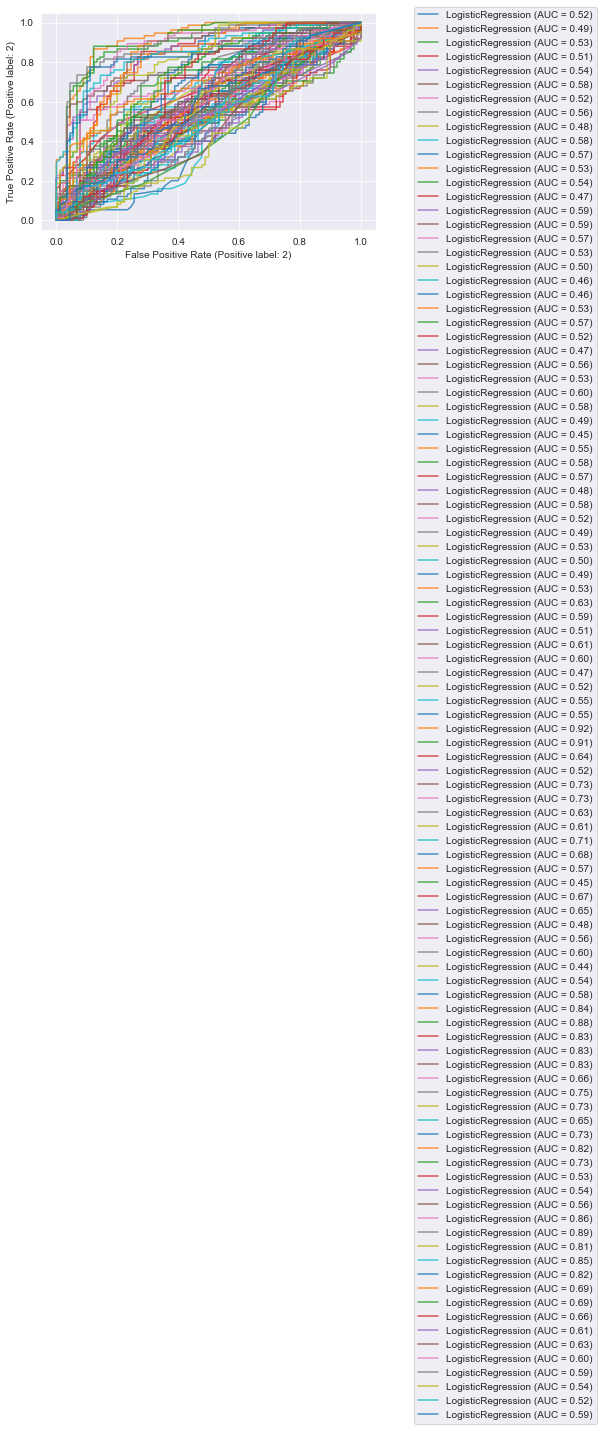

In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

ax = plt.gca()
auc_array = []

for i in range(X_mod.shape[1]):
    
    x_i = X_mod.iloc[:, i].to_numpy().reshape(-1, 1)
    y_i = y_mod.to_numpy()
    
    classifier = LogisticRegression()
    classifier.fit(x_i, y_i)
    rfc_disp = RocCurveDisplay.from_estimator(classifier, x_i, y_i, ax=ax, alpha=0.8)
    
    auc_array.append(roc_auc_score(y_i, classifier.decision_function(x_i)))
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
    

In [441]:
len(auc_array)

101

In [442]:
valid_indices = []

tot = 0

for i in range(len(auc_array)):
    if auc_array[i] > 0.85:
        tot+=1
        valid_indices.append(i)
        
tot

5

In [443]:
valid_indices

[51, 52, 72, 86, 87]

In [444]:
cols = list(X_mod.columns)

for i in valid_indices:
    print(cols[i])

A_C1W1T2
A_C2W1T2
cC_C1W1T2
lC_C2W1T2
cC_C2W1T2


These are the 5 features with the highest AUC scores.

#### Creating Heatmap of Features with Highest AUC Scores and Target

<AxesSubplot:>

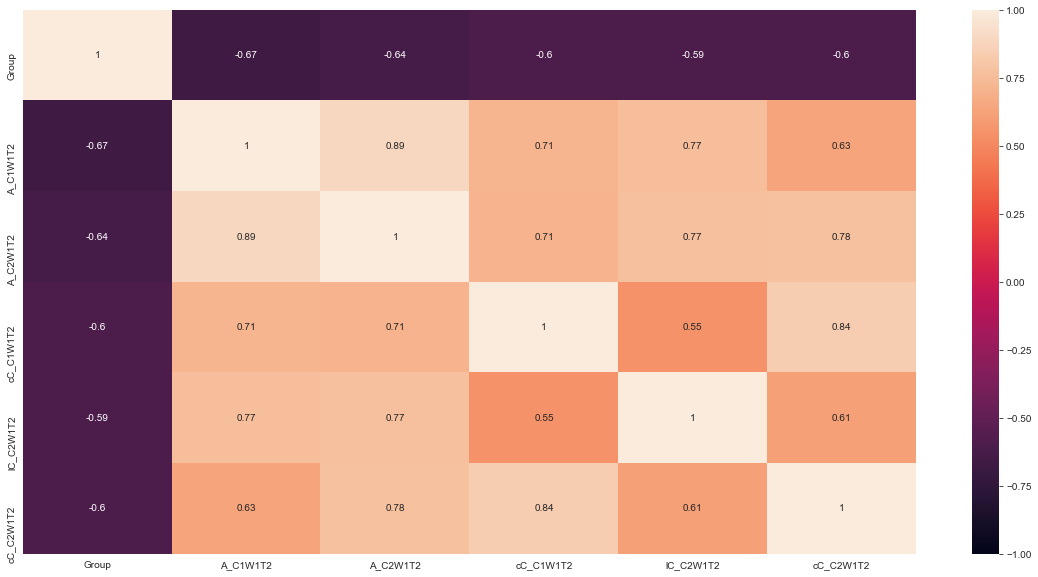

In [445]:
heatmapdf = animaldf[["Group", "A_C1W1T2", "A_C2W1T2", "cC_C1W1T2", "lC_C2W1T2", "cC_C2W1T2"]]

plt.figure(figsize=(20,10))
sns.heatmap(heatmapdf.corr(),vmin=-1,vmax=1,annot=True)

Across the board, the heatmap affirms what I learned when I plotted the ROC Curves and calculated the AUC scores of all the feature variables. A_C1W1T2 has the highest correlation with the target, followed by A_C2W1T2, and then cC_C1W1T2, lC_C2W1T2, and cC_C2W1T2.

However, something to note here is how correlated the feature variables are to each other as well.  All of the correlations are above 0.5, with most correlation values even above 0.7.  This just shows that some of the best feature variables are accounting for the same things, and that is maybe why they are all so strong in the first place.

#### Popping out Target Variable

In [246]:
y = animaldf.iloc[:, 0]

X = animaldf.drop(["Group"], axis=1)

In [247]:
cols = list(X.columns)

#### Scaling all values in X to values between 0 to 1 so none overpower the others

In [192]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_X=pd.DataFrame(scaler.fit_transform(X), columns = cols)

In [193]:
scaled_X

Levels  A_C1W1T0  A_C2W1T0  L_C1W1T0  L_C2W1T0  A_C1W2T0  A_C2W2T0  \
0       0.0  0.035383  0.019108  0.714286  0.714286  0.393431  0.373027   
1       0.5  0.000000  0.216561  0.571429  0.428571  0.368613  0.512195   
2       1.0  0.178602  0.157113  0.571429  0.571429  0.572263  0.494978   
3       0.0  0.302443  0.336518  0.714286  0.714286  0.394161  0.362984   
4       0.5  0.275484  0.750531  0.571429  0.428571  0.402190  0.461980   
..      ...       ...       ...       ...       ...       ...       ...   
178     1.0  0.204718  0.153928  0.571429  0.285714  0.390511  0.205882   
179     1.0  0.217355  0.145435  0.571429  0.285714  0.415328  0.232425   
180     1.0  0.375737  0.065817  0.857143  0.857143  0.525547  0.424677   
181     1.0  0.386689  0.000000  0.714286  0.857143  0.516788  0.364419   
182     1.0  0.406066  0.076433  0.714286  0.571429  0.407299  0.258967   

     L_C1W2T0  L_C2W2T0  A_C1W3T0  ...  rC_C2W2T2  lC_C2W3T2  cC_C2W3T2  \
0         0.8  0.538462  0.027010  ...   0.569518   0.453664   0.632484   
1         0.6  0.307692  0.050251  ...   0.835427   0.741242   0.584779   
2         0.7  0.538462  0.177136  ...   0.871473   0.699025   0.523182   
3         0.9  0.615385  0.030151  ...   0.266497   0.326622   0.272924   
4         0.7  0.384615  0.063442  ...   0.483034   0.377709   0.302694   
..        ...       ...       ...  ...        ...        ...        ...   
178       0.5  0.230769  0.423367  ...   0.177709   0.182253   0.198326   
179       0.5  0.230769  0.407035  ...   0.173035   0.190671   0.193709   
180       0.2  0.076923  0.987437  ...   0.297965   0.246802   0.275042   
181       0.2  0.076923  1.000000  ...   0.284890   0.216160   0.262098   
182       0.2  0.076923  0.912060  ...   0.291014   0.211483   0.255443   

     rC_C2W3T2  lC_C2W4T2  cC_C2W4T2  rC_C2W4T2  lC_C2W5T2  cC_C2W5T2  \
0     0.560947   0.223508   0.581937   0.390952   0.704106   0.269274   
1     0.493300   0.605418   0.775301   0.397435   0.717391   0.352194   
2     0.448932   0.699009   0.607294   0.184007   0.938406   0.626597   
3     0.183157   0.291970   0.511572   0.369011   0.315217   0.469307   
4     0.293927   0.561790   0.620606   0.316153   0.397343   0.183791   
..         ...        ...        ...        ...        ...        ...   
178   0.176157   0.042420   0.109668   0.095743   0.140097   0.106855   
179   0.158318   0.001920   0.042092   0.066821   0.161836   0.152161   
180   0.331500   0.295997   0.256103   0.109207   0.327295   0.336807   
181   0.350618   0.281231   0.224407   0.093749   0.336957   0.334242   
182   0.351790   0.287271   0.223139   0.080784   0.177536   0.337662   

     rC_C2W5T2  
0     0.345263  
1     0.216842  
2     0.627368  
3     0.642105  
4     0.355789  
..         ...  
178   0.171368  
179   0.077053  
180   0.482105  
181   0.433684  
182   0.703158  

[183 rows x 101 columns]

#### Train Test Split

In [194]:
from sklearn.model_selection import train_test_split

seed = 2022
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = seed)

In [270]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Models

#### Evaluation Metrics

In [264]:
#cross validate over accuracy

def getAccuracy(actual, predicted):
    numCorrect = 0
    
    for i in range(len(actual)):
        if predicted[i] == actual[i]:
            numCorrect += 1
    
    return numCorrect/len(actual)
            


#### Logistic Regression with L1 penalty

In [458]:
from sklearn import linear_model

def runLog1(C_in):

    kf = KFold(n_splits = 5)
    
    sumAcc = 0

    for train_index, val_index in kf.split(X_train):
        X_train_only , X_val = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
        y_train_only , y_val = y_train[train_index], y_train[val_index]

        model = linear_model.LogisticRegression(penalty="l1", solver="liblinear", C = C_in)

        model.fit(X_train_only, y_train_only)
        pred_values = model.predict(X_val)
        
        #print(type(pred_values))
        
        acc = getAccuracy(pred_values.tolist(), y_val.tolist())
        sumAcc += acc

    return sumAcc/5

In [459]:
decrArray = [0.01, 0.1, 1, 10, 100]
outArray = []

for decr_val in decrArray:
    outArray.append(runLog1(decr_val))
    
outArray

[0.47954022988505746,
 0.47954022988505746,
 0.8216091954022989,
 0.8903448275862068,
 0.8834482758620691]

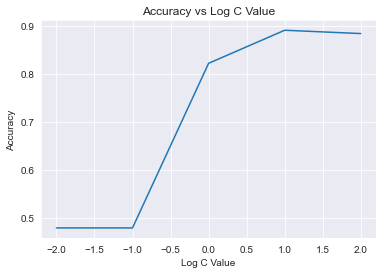

In [460]:
from math import log

log_c_vals = []

for val in decrArray:
    log_c_vals.append(round(log(val, 10), 2))

plt.plot(log_c_vals, outArray)

plt.title("Accuracy vs Log C Value")
plt.xlabel("Log C Value")
plt.ylabel("Accuracy")

plt.show()

In [461]:
model1 = linear_model.LogisticRegression(penalty="l1", solver="liblinear", C = 10)

model1.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

#### Random Forest

In [473]:
from sklearn.model_selection import KFold
from sklearn import ensemble 

def runForest(decrease):

    kf = KFold(n_splits = 5)
    
    sumAcc = 0

    for train_index, val_index in kf.split(X_train):
        X_train_only , X_val = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
        y_train_only , y_val = y_train[train_index], y_train[val_index]

        model = ensemble.RandomForestClassifier(min_impurity_decrease = decrease)

        model.fit(X_train_only, y_train_only)
        pred_values = model.predict(X_val)
        
        #print(type(pred_values))
        
        acc = getAccuracy(pred_values.tolist(), y_val.tolist())
        sumAcc += acc

    return sumAcc/5

In [475]:
decrArray = [0.001, 0.005, 0.01, 0.05, 0.1]
outArray = []

for decr_val in decrArray:
    outArray.append(runForest(decr_val))
    
outArray

[0.869655172413793,
 0.869655172413793,
 0.8763218390804598,
 0.8211494252873563,
 0.8349425287356322]

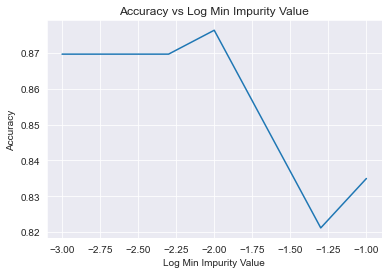

In [477]:
from math import log

log_imp_vals = []

for val in decrArray:
    log_imp_vals.append(round(log(val, 10), 2))

plt.plot(log_imp_vals, outArray)

plt.title("Accuracy vs Log Min Impurity Value")
plt.xlabel("Log Min Impurity Value")
plt.ylabel("Accuracy")

plt.show()

In [472]:
model2 = ensemble.RandomForestClassifier(min_impurity_decrease = 0.01)

model2.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.01)

#### Explainable Boosting Machine

In [479]:
import interpret

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

import pandas as pd
from sklearn.model_selection import train_test_split

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show


In [480]:
def runEBM(lr):

    kf = KFold(n_splits = 5)
    
    sumAcc = 0

    for train_index, val_index in kf.split(X_train):
        X_train_only , X_val = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
        y_train_only , y_val = y_train[train_index], y_train[val_index]

        model = ExplainableBoostingClassifier(learning_rate = lr)

        model.fit(X_train_only, y_train_only)
        pred_values = model.predict(X_val)
        
        #print(type(pred_values))
        
        acc = getAccuracy(pred_values.tolist(), y_val.tolist())
        sumAcc += acc

    return sumAcc/5

In [481]:
decrArray = [0.001, 0.005, 0.01, 0.05, 0.1]
outArray = []

for decr_val in decrArray:
    outArray.append(runEBM(decr_val))
    
outArray

C:\Users\razaa\anaconda3\lib\site-packages\interpret\glassbox\ebm\ebm.py:922: UserWarning:

Multiclass is still experimental. Subject to change per release.

C:\Users\razaa\anaconda3\lib\site-packages\interpret\glassbox\ebm\ebm.py:925: UserWarning:

Detected multiclass problem: forcing interactions to 0



[0.883448275862069,
 0.8903448275862068,
 0.8903448275862068,
 0.883448275862069,
 0.876551724137931]

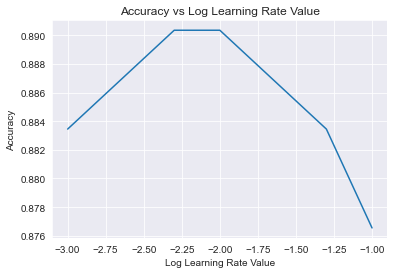

In [482]:
from math import log

log_lr_vals = []

for val in decrArray:
    log_lr_vals.append(round(log(val, 10), 2))

plt.plot(log_lr_vals, outArray)

plt.title("Accuracy vs Log Learning Rate Value")
plt.xlabel("Log Learning Rate Value")
plt.ylabel("Accuracy")

plt.show()

In [297]:
model3 = ExplainableBoostingClassifier(learning_rate = 0.01)

model3.fit(X_train, y_train)

C:\Users\razaa\anaconda3\lib\site-packages\interpret\glassbox\ebm\ebm.py:922: UserWarning: Multiclass is still experimental. Subject to change per release.
  warn("Multiclass is still experimental. Subject to change per release.")
C:\Users\razaa\anaconda3\lib\site-packages\interpret\glassbox\ebm\ebm.py:925: UserWarning: Detected multiclass problem: forcing interactions to 0
  warn("Detected multiclass problem: forcing interactions to 0")


ExplainableBoostingClassifier(feature_names=['Levels', 'A_C1W1T0', 'A_C2W1T0',
                                             'L_C1W1T0', 'L_C2W1T0', 'A_C1W2T0',
                                             'A_C2W2T0', 'L_C1W2T0', 'L_C2W2T0',
                                             'A_C1W3T0', 'A_C2W3T0', 'L_C1W3T0',
                                             'L_C2W3T0', 'A_C1W4T0', 'A_C2W4T0',
                                             'L_C1W4T0', 'L_C2W4T0', 'A_C1W5T0',
                                             'A_C2W5T0', 'L_C1W5T0', 'L_C2W5T0',
                                             'lC_C1W1T0', 'cC_C1W1T0',
                                             'rC_C1W1T0', 'lC_C1W2T0',
                                             'cC_C1W2T0', 'rC_C1W2T0',
                                             'lC_...
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous', ...],
                              interactions=0)

#### Gradient Boosting Classifier

In [483]:
def runBoost(rate):

    kf = KFold(n_splits = 5)
    
    sumAcc = 0

    for train_index, val_index in kf.split(X_train):
        X_train_only , X_val = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
        y_train_only , y_val = y_train[train_index] , y_train[val_index]

        model = ensemble.GradientBoostingClassifier(learning_rate = rate)

        model.fit(X_train_only,y_train_only)
        pred_values = model.predict(X_val)

        acc = getAccuracy(pred_values.tolist(), y_val.tolist())
        sumAcc += acc

    return sumAcc/5

In [484]:
rateArray = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
outArray = []

for rate_val in rateArray:
    outArray.append(runBoost(rate_val))
    
outArray

[0.8078160919540229,
 0.8349425287356322,
 0.8418390804597701,
 0.8554022988505746,
 0.8554022988505746,
 0.9036781609195403]

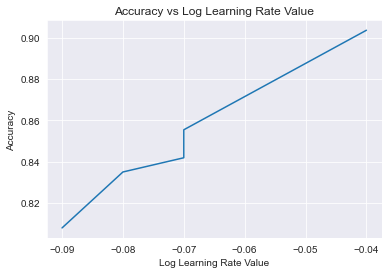

In [485]:
from math import log

log_lr_vals = []

for val in outArray:
    log_lr_vals.append(round(log(val, 10), 2))

plt.plot(log_lr_vals, outArray)

plt.title("Accuracy vs Log Learning Rate Value")
plt.xlabel("Log Learning Rate Value")
plt.ylabel("Accuracy")

plt.show()

In [289]:
model4 = ensemble.GradientBoostingClassifier(learning_rate = 0.5)

model4.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5)

### Performances of Models on Test Set

#### Logistic Regression with L1 penalty

In [293]:
test_pred = model1.predict(X_test)

test_acc = getAccuracy(y_test.tolist(), test_pred.tolist())

test_acc

0.8108108108108109

#### Random Forest

In [345]:
test_pred = model2.predict(X_test)

test_acc = getAccuracy(y_test.tolist(), test_pred.tolist())

test_acc

0.8378378378378378

#### Explainable Boosting Machine

In [346]:
test_pred = model3.predict(X_test)

test_acc = getAccuracy(y_test.tolist(), test_pred.tolist())

test_acc

0.8378378378378378

#### Gradient Boosting Classifier

In [299]:
test_pred = model4.predict(X_test)

test_acc = getAccuracy(y_test.tolist(), test_pred.tolist())

test_acc

0.7837837837837838

### Variable Importance

#### Function to find N max values from a list (used to find most important variables)

In [446]:
def Nmaxelements(list1, N):
    final_list = []
    index_list = []
 
    for i in range(0, N):
        max1 = 0
        index1 = 0
         
        for j in range(len(list1)):    
            if (list1[j]) > max1:
                max1 = list1[j];
                index1 = j
                
                 
        list1.remove(max1);
        final_list.append(max1)
        index_list.append(index1)

         
    return(final_list, index_list)

#### Logistic Regression with L1 penalty

In [447]:
importance=model1.coef_[0]
importance

array([ 1.53580113,  0.        , -6.78816677,  0.        ,  0.        ,
       -2.89425498,  0.        , -0.10413724,  0.        ,  0.        ,
       -6.51683361,  1.49270507,  0.        ,  0.        ,  0.26863337,
        0.        , -3.48827426,  6.0586694 ,  2.14663173, -1.88206971,
        0.        ,  0.        , -1.83605789, -0.35683041,  0.        ,
       -3.04620927, -0.91383725,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -4.85090823,  6.69862908,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  3.33527774,
        0.        ,  0.        ,  0.        , -2.32430485,  0.        ,
        0.        , -4.91515915,  0.        ,  0.        ,  0.        ,
        0.        , 11.84799849,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.9997807 ,  0.        ,  0.        ,
       -0.34785037,  1.72741996,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.70550872,  0.  

In [448]:
importance_abs = list(map(abs, importance))


dub, indices = Nmaxelements(importance.tolist(), 5)

dub

[11.847998491219041,
 8.206282271232935,
 6.698629075493276,
 6.058669402575738,
 4.728067126338417]

In [449]:
indices

[51, 86, 33, 17, 71]

In [450]:
for i in indices:
    print(cols[i])

A_C1W1T2
lC_C2W1T2
lC_C1W5T0
A_C1W5T0
lC_C1W1T2


These are the 5 features with the highest variable importance in order.

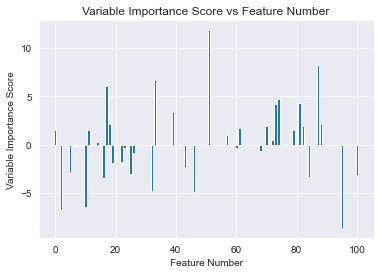

In [451]:
#plotting the features and their score
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)

plt.title("Variable Importance Score vs Feature Number")
plt.xlabel("Feature Number")
plt.ylabel("Variable Importance Score")

plt.show()

#### Random Forest

In [452]:
importance = model2.feature_importances_
importance

array([0.00103057, 0.00590808, 0.00232161, 0.00447855, 0.00266532,
       0.0084596 , 0.01594495, 0.00177093, 0.00074709, 0.00935001,
       0.01031808, 0.00152278, 0.        , 0.01726061, 0.00709315,
       0.00444527, 0.00264822, 0.00680725, 0.00352762, 0.00194951,
       0.00548011, 0.00570799, 0.00844998, 0.0061205 , 0.00141279,
       0.0065363 , 0.0052145 , 0.0034903 , 0.00851819, 0.00308202,
       0.00767912, 0.00584457, 0.00297858, 0.00920782, 0.00218301,
       0.00174672, 0.00528782, 0.00715418, 0.00998456, 0.00033899,
       0.00862358, 0.01214528, 0.00655844, 0.00633198, 0.00254366,
       0.00404473, 0.01572423, 0.00342573, 0.00410929, 0.00264326,
       0.00138843, 0.06891527, 0.08359951, 0.00112725, 0.00185499,
       0.01048653, 0.01956023, 0.00311962, 0.00259745, 0.00433239,
       0.00425264, 0.00121108, 0.00164519, 0.00416902, 0.00542027,
       0.00431112, 0.00447729, 0.00238314, 0.00733463, 0.00631613,
       0.0023116 , 0.02453441, 0.03206362, 0.04704026, 0.02031

In [453]:
importance_abs = list(map(abs, importance))


dub, indices = Nmaxelements(importance.tolist(), 5)

dub

[0.08359950502436134,
 0.06891526789527233,
 0.04704025866487382,
 0.04700387114094957,
 0.04405502358131406]

In [454]:
indices

[52, 51, 71, 87, 83]

In [455]:
for i in indices:
    print(cols[i])

A_C2W1T2
A_C1W1T2
lC_C1W1T2
cC_C2W1T2
lC_C1W5T2


These are the 5 features with the highest variable importance in order.

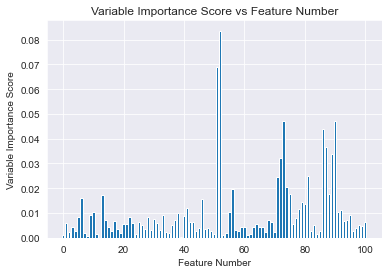

In [456]:
#plotting the features and their score
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)

plt.title("Variable Importance Score vs Feature Number")
plt.xlabel("Feature Number")
plt.ylabel("Variable Importance Score")

plt.show()

#### Explainable Boosting Machine

In [311]:
#plotting the features and their score in descending order

ebm_global = model3.explain_global()
show(ebm_global)

The five features with the highest variable importance, in order, are A_C2W1T2, cC_C2W2T2, cC_C2W2T2, A_C1W1T2, and cC_C1W1T2.